In [1]:
import os
import cv2
import random
import matplotlib.pyplot as plt

base_dir = "data/Data_Brain/Train"

classes = ["Glioma", "Meningioma", "No Tumor", "Pituitary"]




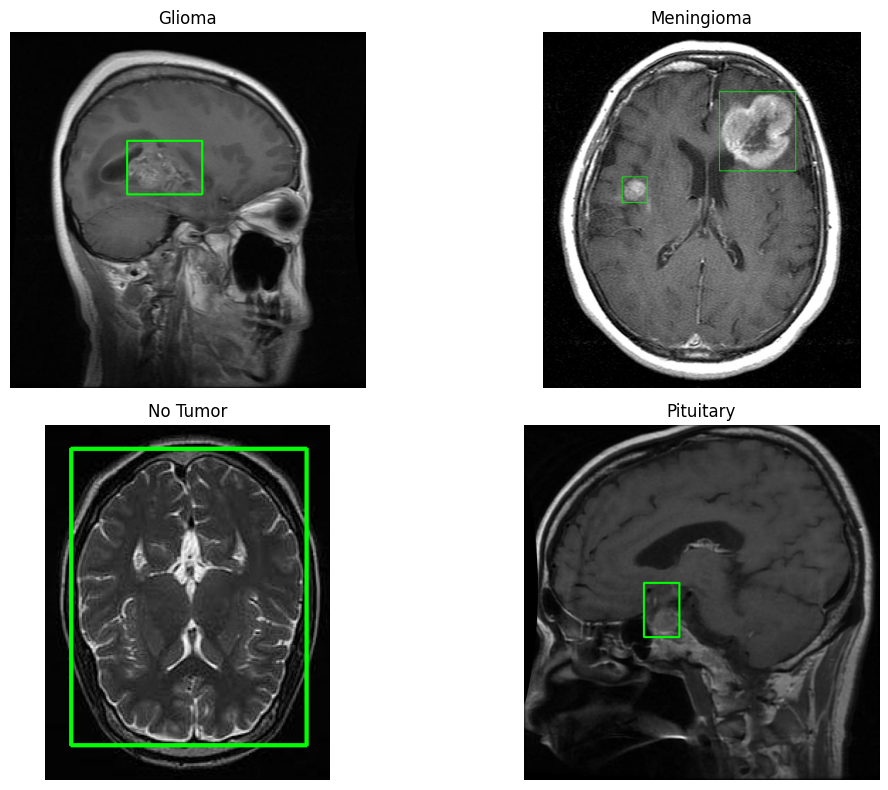

In [3]:

def draw_yolo_boxes(image_path, label_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    h, w, _ = image.shape

    with open(label_path, "r") as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) < 5:
                continue
            cls_id, x_center, y_center, bw, bh = map(float, parts)
            cls_id = int(cls_id)

            x_center, y_center, bw, bh = x_center * w, y_center * h, bw * w, bh * h
            x1 = int(x_center - bw / 2)
            y1 = int(y_center - bh / 2)
            x2 = int(x_center + bw / 2)
            y2 = int(y_center + bh / 2)

            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    return image

plt.figure(figsize=(12, 8))

all_images = []
for i, cls in enumerate(classes):
    img_dir = os.path.join(base_dir, cls, "images")
    label_dir = os.path.join(base_dir, cls, "labels")

    images = [f for f in os.listdir(img_dir) if f.lower().endswith((".jpg", ".png", ".jpeg"))]
    all_images = all_images + images
    if not images:
        continue
    img_file = random.choice(images)

    img_path = os.path.join(img_dir, img_file)
    label_path = os.path.join(label_dir, os.path.splitext(img_file)[0] + ".txt")

    if os.path.exists(label_path):
        img = draw_yolo_boxes(img_path, label_path)
    else:
        img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)

    plt.subplot(2, 2, i+1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
import shutil
from sklearn.model_selection import train_test_split

for cls in classes:
    img_dir= f"data/Data_Brain/Train/{cls}/images"
    valid_images, train_images = train_test_split(all_images, test_size=0.2, random_state=42)

    for split in ["train", "valid"]:
        os.makedirs(os.path.join(base_dir,cls, "images", split), exist_ok=True)
        os.makedirs(os.path.join(base_dir,cls, "labels", split), exist_ok=True)

    for split_name, split_list in [("train", train_images), ("valid", valid_images)]:
        for img_name in split_list:
            img_path = os.path.join(img_dir, img_name)
            label_name = os.path.splitext(img_name)[0] + ".txt"
            label_path = os.path.join(label_dir, label_name)

            # if os.path.exists(label_path):
            #     shutil.copy(img_path, os.path.join(output_dir, "images", split_name, cls, img_name))
            #     shutil.copy(label_path, os.path.join(output_dir, "labels", split_name, cls, label_name))
            # else:
            #     print(f"Label manquant pour l'image {img_name}, elle sera ignorée.")


In [6]:
print(img_dir)

data/Data_Brain/Train\Pituitary\images
